In [1]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd

In [3]:
def read(filename):
    rate, data = wavfile.read(filename)
    length = data.shape[0] / rate
    time = np.linspace(0, length, data.shape[0], endpoint=False)
    return time, data

def print_info(time, data):
    print(f"time: {time}")
    print(f"data: {data}")
    print(f"rate: {1/(time[1]-time[0])} Hz")
    print(f"duration: {time[-1]+time[1]} s")
    print(f"shape: {data.shape}")
    print(f"dtype: {data.dtype}")
    
def fft(t, signal):
    a = np.fft.fftfreq(len(t)) / (t[1] - t[0])
    b = np.fft.fft(signal)
    return np.fft.fftshift(a), np.fft.fftshift(b)

In [4]:
ipd.Audio("clap.wav")

In [5]:
time, data = read("clap.wav")
print_info(time, data)

time: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.16394785e+01
 2.16395011e+01 2.16395238e+01]
data: [ -1  -2  -3 ... 176 134  80]
rate: 44100.00000000001 Hz
duration: 21.63954648526077 s
shape: (954304,)
dtype: int16


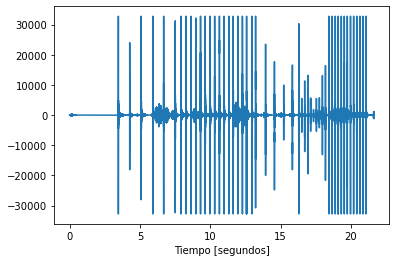

In [6]:
plt.plot(time, data)
plt.xlabel("Tiempo [segundos]");

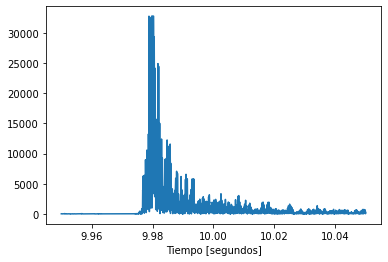

In [7]:
sel = np.abs(time- 10) < .05
plt.plot(time[sel], np.abs(1.*data[sel]))
plt.xlabel("Tiempo [segundos]");

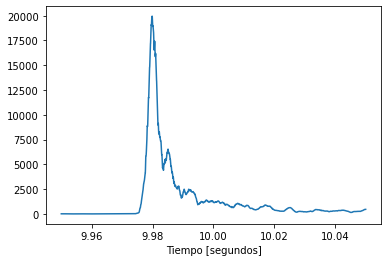

In [11]:
from scipy.ndimage.filters import uniform_filter1d

def smooth_abs(data):
    return uniform_filter1d(np.abs(1.*data), size=100)

sel = np.abs(time- 10) < .05
plt.plot(time[sel], smooth_abs(data[sel]))
plt.xlabel("Tiempo [segundos]");

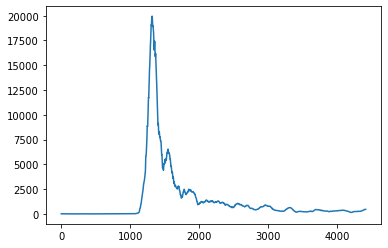

In [12]:
sel = np.abs(time- 10) < .05
plt.plot(smooth_abs(data[sel]))

In [19]:
time1, data1 = time[sel], smooth_abs(data[sel])
from scipy.signal import find_peaks
height = 10000
peaks, info = find_peaks(data1, height=height, width=100)
#print(f"Peaks: {peaks}")
#print(f"Info: {info}")

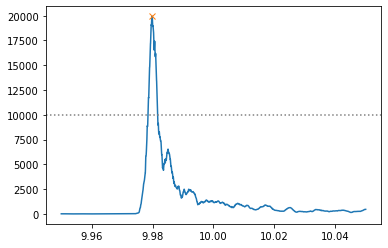

In [20]:
plt.plot(time1, data1)
plt.plot(time1[peaks], data1[peaks], "x")
plt.axhline(height, linestyle=":", color='gray');

In [21]:
from scipy.signal import find_peaks
height = 2000
sdata = smooth_abs(data)
peaks, info = find_peaks(sdata, height=height, width=100)
print(f"Peaks: {len(peaks)}")

Peaks: 61


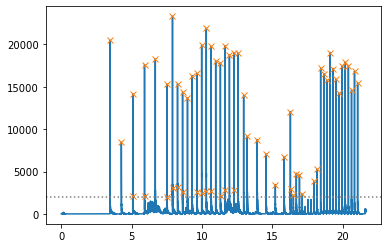

In [22]:
plt.plot(time, sdata)
plt.plot(time[peaks], sdata[peaks], "x")
plt.axhline(height, linestyle=":", color='gray');

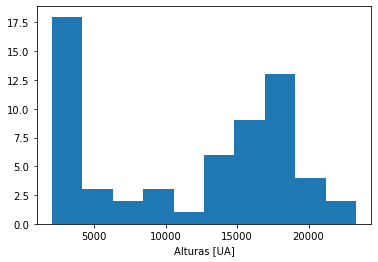

In [23]:
plt.hist(info['peak_heights']);
plt.xlabel("Alturas [UA]");

In [24]:
delta = time[peaks[1:]] - time[peaks[:-1]]

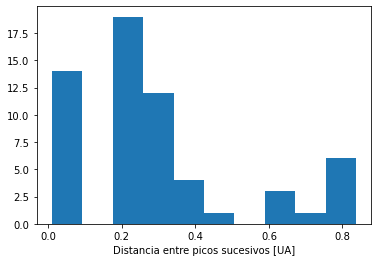

In [25]:
plt.hist(delta);
plt.xlabel("Distancia entre picos sucesivos [UA]");

In [ ]:
Para hacer
----------

1. ¿Qué podria usarse para encontrar el valor umbral automáticamente?
2. Buscar que otros métodos de deteccion de picos hay. En que se diferencian.